# Perceptron to AND, OR, NAND & NOR Logic Gates.


In [1]:
#loading required package
import numpy as np
import matplotlib.pyplot as plt

## Perceptron unit :
\begin{equation}
    \sum_{i=1}^{n} w_ix_i >= \theta ,\ y=1 \\
    \sum_{i=1}^{n} w_ix_i < \theta  ,\ y=0
\end{equation}

In [2]:
#using above equation to create single unit of perceptron.
def perceptron(x,w,threshold):
    sum = 0 
    for xi,wi in zip(x,w):         #x1w1+x2w2+x3w3+.....+xnwn
        sum += xi*wi
    if sum>= threshold:                #  wx - theta >=0 
        return 1
    else:
        return 0
    
   

## Delta Learning Algorithm :
\begin{equation}
                error(p) = y_{train(p)} - y_{predicted(p)} \\
                w_i(p+1) = w_i + \alpha * x * error(p)
\end{equation}

In [3]:
#Delta Learning Algorithm using above two equations
def deltaLearningAlgorithm(x_train,y_train,alpha=1e-2,max_epoch=100):
    w = np.zeros(x_train.shape[1])
    theta = np.random.random()
    #theat = 0
    print("Initial Weight --> ",w)
    print("Initial Thresold -->",theta)
    
    for c in range(max_epoch):
        for i in range(x_train.shape[0]):
            y_predicted = perceptron(x_train[i],w,threshold=theta)
            error = y_train[i] - y_predicted
            if y_train[i]==y_predicted:
                error= 0
            elif y_train[i] < y_predicted:
                error= -1
            else:
                error= +1
    
        
            dw = alpha*x_train[i]*error
            dtheta = alpha*1*error
            w = w +dw                        #updating weight
            theta = theta - dtheta           #updating thresold i.e, theta
            
            
            
    return w,theta

### Defining function to find Accuracy:

 Testing data will be nearby points, For example : (0,0)-> nearby points 0.1,0.1 and 0.05,0.05 

In [5]:
def accuracy(x_test,y_test,w,thresold):
    count =0
    m,n = x_test.shape
    for i in range(m):
        predict = perceptron(x_test[i],w,thresold)
        if predict==y_test[i]:
            count +=1
    
    return (count*100)/m

# 2 input gates:

## Visualization by plotting for 2 i/p AND gate

Initial Weight -->  [0. 0.]
Initial Thresold --> 0.7357175641666595
Final Weight   -> [0.3 0.3]
Final Thresold -> 0.4357175641666595
For training data(prediction) --->  
0
0
0
1


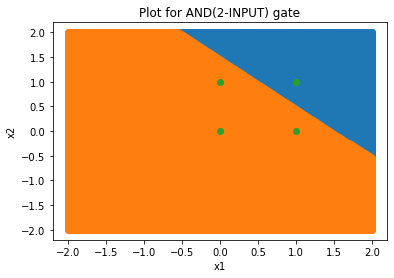

In [48]:
#training dataset
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y_and = np.array([0,0,0,1])
y_or = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])
y_nor = np.array([1,0,0,0])


# executing delta learning algorithm to learn weights and bias of perceptron
w_final,theta_final = deltaLearningAlgorithm(x,y_and,alpha=1e-1,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  \n")
for i in range(4):
    print(perceptron(x[i],w_final,threshold=theta_final))
    
# plotting desision bounday
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        if perceptron(np.array([i,j]),w_final,theta_final)>=1:
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

            
plt.scatter(px,py)
plt.scatter(nx,ny)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot for AND(2-INPUT) gate")
plt.scatter(x[:,0],x[:,1])
plt.show()

#plot is for and gate(to get plot for or,nand,nor replace y_and to y_or,y_nand,y_nor in line 9 of this cell)
#blue region is where output = 1
#orange region in where output = 0

## Visualization by plotting for 2 i/p OR gate


Initial Weight -->  [0. 0.]
Initial Thresold --> 0.45555662790596374
Final Weight   -> [0.2 0.2]
Final Thresold -> 0.15555662790596378
For training data(prediction) --->  
0
1
1
1


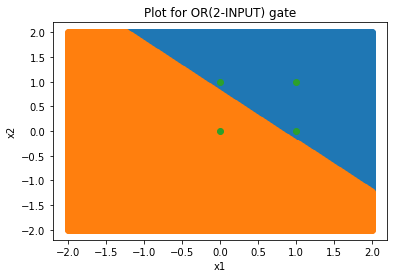

In [45]:
w_final,theta_final = deltaLearningAlgorithm(x,y_or,alpha=1e-1,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  \n")
for i in range(4):
    print(perceptron(x[i],w_final,threshold=theta_final))
    
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        if perceptron(np.array([i,j]),w_final,theta_final)>=1:
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

plt.scatter(px,py)
plt.scatter(nx,ny)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot for OR(2-INPUT) gate")
plt.scatter(x[:,0],x[:,1])
plt.show()



##  Visualization by plotting for 2 i/p NAND gate


Initial Weight -->  [0. 0.]
Initial Thresold --> 0.49036006671873544
Final Weight   -> [-0.1 -0.1]
Final Thresold -> -0.009639933281264529
For training data(prediction) --->  
1
0
0
0


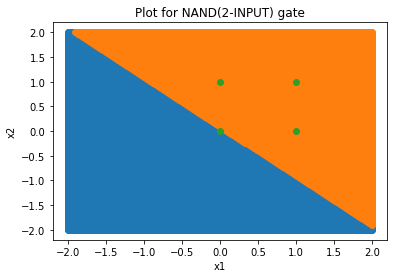

In [46]:

w_final,theta_final = deltaLearningAlgorithm(x,y_nor,alpha=1e-1,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  \n")
for i in range(4):
    print(perceptron(x[i],w_final,threshold=theta_final))
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        if perceptron(np.array([i,j]),w_final,theta_final)>=1:
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

plt.scatter(px,py)
plt.scatter(nx,ny)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot for NAND(2-INPUT) gate")
plt.scatter(x[:,0],x[:,1])
plt.show()

## Visualization by plotting for 2 i/p NOR gate


Initial Weight -->  [0. 0.]
Initial Thresold --> 0.6201377259590488
Final Weight   -> [-0.1 -0.1]
Final Thresold -> -0.07986227404095114
For training data(prediction) --->  
1
0
0
0


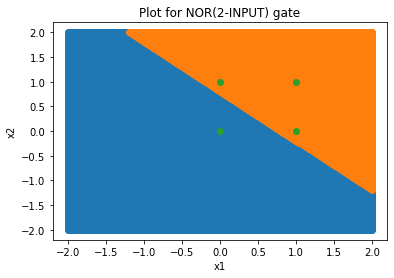

In [47]:
w_final,theta_final = deltaLearningAlgorithm(x,y_nor,alpha=1e-1,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  \n")
for i in range(4):
    print(perceptron(x[i],w_final,threshold=theta_final))
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        if perceptron(np.array([i,j]),w_final,theta_final)>=1:
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

plt.scatter(px,py)
plt.scatter(nx,ny)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot for NOR(2-INPUT) gate")
plt.scatter(x[:,0],x[:,1])
plt.show()



# 3 i/p gates:

In [40]:
#function to plot 3input plots
def plot3d(w_final,theta_final):
    p = np.linspace(-2,2,20)
    px,py,pz=[],[],[]
    nx,ny,nz=[],[],[]
    for i in p:
        for j in p:
            for k in p:
                if perceptron(np.array([i,j,k]),w_final,theta_final)>=1:
                    px.append(i)
                    py.append(j)
                    pz.append(k)
                else:
                    nx.append(i)
                    ny.append(j)
                    nz.append(k)



    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(px,py,pz,color='blue')
    ax.scatter3D(nx,ny,nz,color='red')
    ax.set_title('Plot (blue=1 as output),(red=0 as output)')
    ax.set_xlabel('$x1$',)
    ax.set_ylabel('$x2$')
    ax.set_zlabel("$x3$",)
    ax.yaxis._axinfo['label']['space_factor'] = 3.0
    plt.title("3 i/p gate (Blue=1 ,Red=0)")
    plt.show()

### Training Dataset for 3 input gates:

In [28]:
#Training dataset for 3input
x_train=[[0,0,0],
         [0,0,1],
         [0,1,0],
         [0,1,1],
         [1,0,0],
         [1,0,1],
         [1,1,0],
         [1,1,1]]

#OUTPUT
y_train_and  = np.array([0,0,0,0,0,0,0,1])  #AND
y_train_or   = np.array([0,1,1,1,1,1,1,1])  #OR
y_train_nand = np.array([1,1,1,1,1,1,1,0])  #NAND
y_train_nor  = np.array([1,0,0,0,0,0,0,0])  #NAND
x_train = np.array(x_train)
print(x_train.shape,y_train_and.shape)

(8, 3) (8,)


### Testing Dataset for 3 input gates:

In [29]:
a=np.linspace(-0.1,0.1,5)        #points nearer to zero -0.1 to 0.1
b=np.linspace(0.9,1.1,5)        #points nearer to one  0.9 to 1.1
c = np.hstack((a,b)) 
x_test = []
y_test_and = []
y_test_or = []
y_test_nor = []
y_test_nand = []

for i in c:                   #creating combination of points with three input
    for j in c:
        for k in c:
            x_test.append([i,j,k])
            tmp = np.round(x_test[-1])
            and_x = tmp[0] and tmp[1] and tmp[2]
            or_x = tmp[0] and tmp[1] and tmp[2]
            y_test_and.append(and_x)
            y_test_or.append(or_x)
            
            if and_x==0:
                y_test_nand.append(1)
            else:
                y_test_nand.append(0)
            
            if or_x==0:
                y_test_nor.append(1)
                y_test_nor.append(0)
                
            
x_test = np.array(x_test)
y_test_and = np.array(y_test_and)
y_test_or = np.array(y_test_or)
y_test_nand = np.array(y_test_nand)
y_test_nor = np.array(y_test_nor)
print(x_test.shape,y_test_and.shape)
print("Display top 10 testing inputs ",x_test[:10,:])   

(1000, 3) (1000,)
Display top 10 testing inputs  [[-0.1  -0.1  -0.1 ]
 [-0.1  -0.1  -0.05]
 [-0.1  -0.1   0.  ]
 [-0.1  -0.1   0.05]
 [-0.1  -0.1   0.1 ]
 [-0.1  -0.1   0.9 ]
 [-0.1  -0.1   0.95]
 [-0.1  -0.1   1.  ]
 [-0.1  -0.1   1.05]
 [-0.1  -0.1   1.1 ]]


## AND (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.5553115451846449
Final Weight   -> [0.14 0.14 0.14]
Final Thresold -> 0.41531154518464475
For training data(prediction) --->  0,0,0,0,0,0,0,1,

Accuracy  ------> 94.7


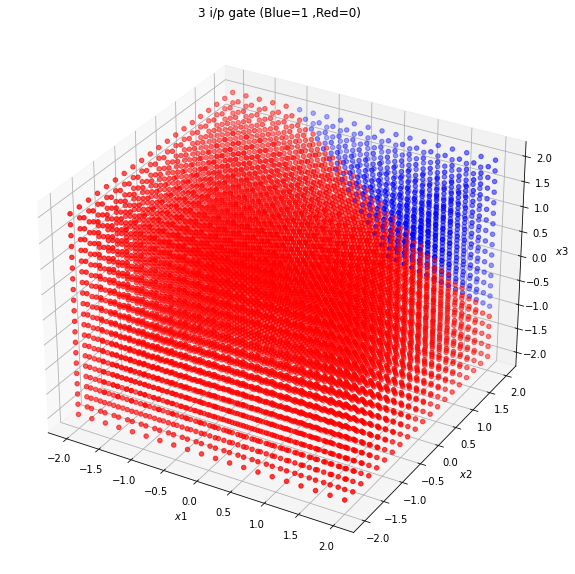

In [41]:
#Applying delta learning algorithm for and.
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_and,alpha=1e-2,max_epoch=300)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_and,w_final,theta_final))
plot3d(w_final,theta_final)

### OR (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.0863748990489005
Final Weight   -> [0.02 0.03 0.04]
Final Thresold -> 0.0163748990489005
For training data(prediction) --->  0,1,1,1,1,1,1,1,

Accuracy  ------> 27.2


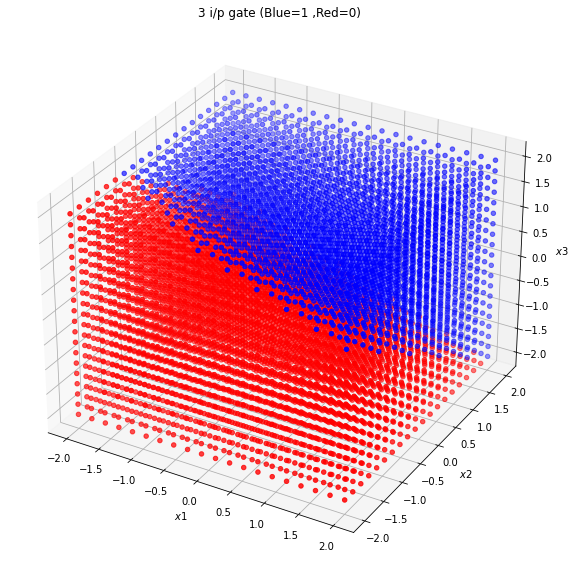

In [42]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_or,alpha=1e-2,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_or,w_final,theta_final))
plot3d(w_final,theta_final)

### NAND (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.8996379304185467
Final Weight   -> [-0.02 -0.01 -0.01]
Final Thresold -> -0.030362069581453995
For training data(prediction) --->  1,1,1,1,1,1,1,0,

Accuracy  ------> 88.8


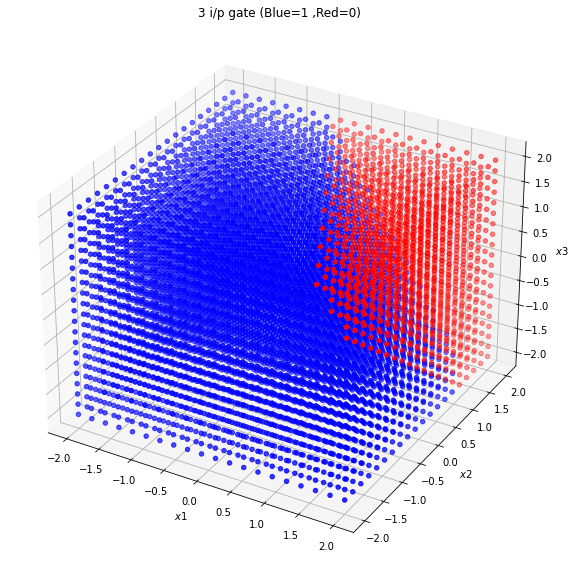

In [43]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_nand,alpha=1e-2,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_nand,w_final,theta_final))
plot3d(w_final,theta_final)

### NOR (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.9601493150510375
Final Weight   -> [-0.01 -0.01 -0.01]
Final Thresold -> -0.009850684948963207
For training data(prediction) --->  1,0,0,0,0,0,0,0,

Accuracy  ------> 53.6


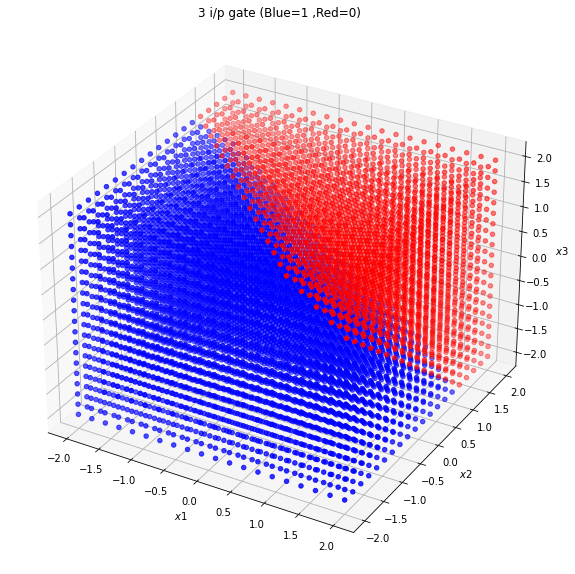

In [44]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_nor,alpha=1e-2,max_epoch=300)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_nor,w_final,theta_final))
plot3d(w_final,theta_final)